file uploading


In [25]:
from google.colab import files
uploaded = files.upload()


Saving ujani_bird_migration.xlsx to ujani_bird_migration (1).xlsx


In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data

In [27]:
df = pd.read_excel("ujani_bird_migration.xlsx", sheet_name="data")

# Preview data

In [28]:
print("First 5 rows:")
print(df.head())

First 5 rows:
             species_name  bird_count observation-date  year    month  \
0                  Osprey           1       2025-10-04  2025  October   
1             Rock Pigeon           1       2025-05-10  2025      May   
2              Asian Koel           1       2025-05-10  2025      May   
3       Green-winged Teal           2       2025-01-26  2025  January   
4  Oriental Honey-buzzard           1       2025-01-26  2025  January   

         season   location            sub_location  
0  Post-Monsoon  Ujani Dam  Flamingo Point, Kettur  
1        Summer  Ujani Dam  Flamingo Point, Kettur  
2        Summer  Ujani Dam  Flamingo Point, Kettur  
3        Winter  Ujani Dam  Flamingo Point, Kettur  
4        Winter  Ujani Dam  Flamingo Point, Kettur  


In [29]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   species_name      928 non-null    object        
 1   bird_count        928 non-null    int64         
 2   observation-date  928 non-null    datetime64[ns]
 3   year              928 non-null    int64         
 4   month             928 non-null    object        
 5   season            928 non-null    object        
 6   location          928 non-null    object        
 7   sub_location      928 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 58.1+ KB
None



# Seasonal bird count


In [30]:
season_bird_count = (
    df.groupby('season')['bird_count']
    .sum()
    .sort_values(ascending=False)
)

In [31]:
print("\nTotal Bird Count per Season:")
print(season_bird_count)


Total Bird Count per Season:
season
Winter          3343
Summer          2480
Monsoon          642
Post-Monsoon     105
Name: bird_count, dtype: int64


# Seasonal species diversity

In [32]:
season_bird = df.groupby('season')['species_name'].nunique()


In [33]:
print("\nUnique Species per Season:")
print(season_bird)


Unique Species per Season:
season
Monsoon         151
Post-Monsoon     62
Summer          110
Winter          209
Name: species_name, dtype: int64


# Top 10 abundant species

In [34]:
abundant_species = (
    df.groupby('species_name')['bird_count']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

In [35]:
print("\nTop 10 Most Abundant Species:")
print(abundant_species)


Top 10 Most Abundant Species:
species_name
Eurasian Coot                 531
Barn Swallow                  511
Greater Flamingo              353
Northern Shoveler             322
Black-tailed Godwit           229
Asian Openbill                210
Northern Pintail              207
Whiskered Tern                182
Garganey                      179
Eastern Red-rumped Swallow    159
Name: bird_count, dtype: int64


# Visualization

  **Seasonal  abundance**

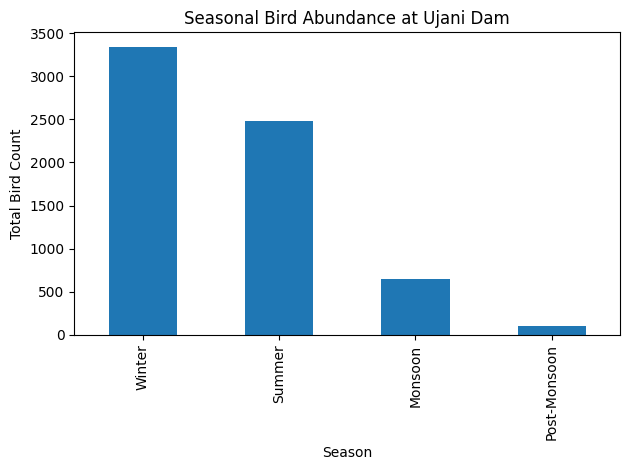

In [36]:
season_bird_count.plot(kind='bar')
plt.title('Seasonal Bird Abundance at Ujani Dam')
plt.xlabel('Season')
plt.ylabel('Total Bird Count')
plt.tight_layout()
plt.show()

**Seasonal diversity**

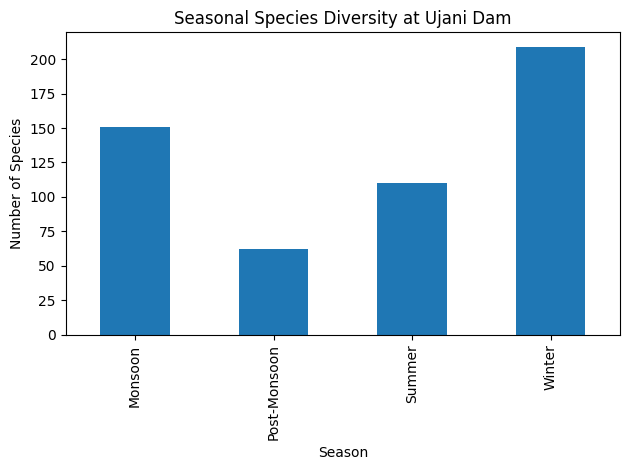

In [37]:
season_bird.plot(kind='bar')
plt.title('Seasonal Species Diversity at Ujani Dam')
plt.xlabel('Season')
plt.ylabel('Number of Species')
plt.tight_layout()
plt.show()

**Top species**

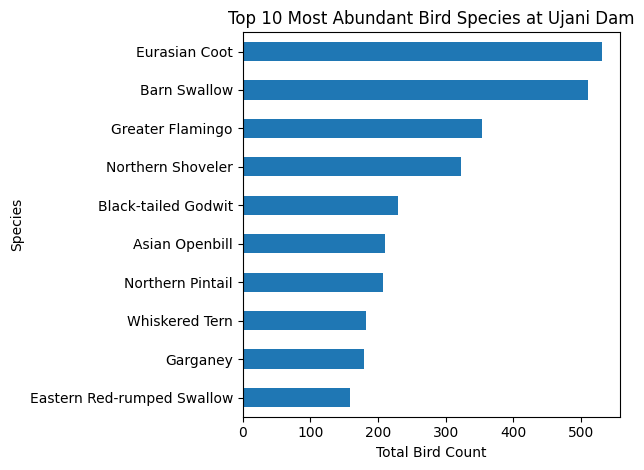

In [38]:
abundant_species.plot(kind='barh')
plt.title('Top 10 Most Abundant Bird Species at Ujani Dam')
plt.xlabel('Total Bird Count')
plt.ylabel('Species')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

 **Total unique species**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [39]:
unique_species = df['species_name'].nunique()
print("\nTotal Unique Bird Species:", unique_species)


Total Unique Bird Species: 286
